# Austin Property Price Analysis

### Datasource
* MLS listing data (zipcode, listing date, listing price)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
listings_csv = "../Datasets/AustinHomePrice/ABoRListings.csv"
zips_csv = "../Datasets/AustinPopulation/AustinZipCodePopulation.csv"


listings_df = pd.read_csv(listings_csv)
listings_df = listings_df.dropna()
listings_df.rename(columns={'ListingZipCode': 'ZipCode'}, inplace=True)

zip_df = pd.read_csv(zips_csv) # get updated list of zips from Ahmar
zip_df.rename(columns={'Zipcode': 'ZipCode'}, inplace=True)


# merge the dataframes
merge_listings_df = pd.merge(listings_df,zip_df,on='ZipCode')
merge_listings_df['ZipCode'] = (merge_listings_df['ZipCode']).astype(int)
merge_listings_df['ListingPrice'] = (merge_listings_df['ListingPrice']).astype(int)
merge_listings_df.drop('2015_Population', axis=1, inplace=True)
merge_listings_df.drop('2016_Population', axis=1, inplace=True)
merge_listings_df.drop('2017_Population', axis=1, inplace=True)
merge_listings_df.drop('2018_Population', axis=1, inplace=True)


# remove zip codes where there are less than 100 listings
count_listings_df = merge_listings_df.groupby(['ZipCode'])['ListingId'].count().to_frame()
count_listings_df.reset_index(inplace=True)
# count_listings_df

zips_to_include_df = count_listings_df[count_listings_df['ListingId'] > 100]  

# now merge back to original dataframe
# remove_listings_grouped_df

merge_listings_df = pd.merge(merge_listings_df,zips_to_include_df,on='ZipCode')
merge_listings_df.drop('ListingId_y', axis=1, inplace=True)
merge_listings_df.rename(columns={'ListingId_x': 'ListingId'}, inplace=True)


# now get median price per year for each year
final_listings_grouped_df = merge_listings_df.groupby(['ZipCode', 'ListingYear'])['ListingPrice'].median().to_frame()
final_listings_grouped_df.reset_index(inplace=True)
final_listings_grouped_df['ListingPrice'] = (final_listings_grouped_df['ListingPrice']).astype(int)

final_listings_grouped_df = final_listings_grouped_df.pivot(index='ZipCode', columns='ListingYear', values='ListingPrice')

# now get median price per year for each year
final_listings_plot_df = merge_listings_df.groupby(['ZipCode', 'ListingYear'])['ListingPrice'].median().to_frame()
final_listings_plot_df.reset_index(inplace=True)
final_listings_plot_df['ListingPrice'] = (final_listings_plot_df['ListingPrice']).astype(int)

final_listings_plot_2015_df = final_listings_plot_df['ListingPrice'] = 2015

# calculate year over year price increase/decreases in %
perc_change_listing_yoy = (final_listings_grouped_df.pct_change(axis='columns', fill_method='ffill'))*100

# then get 2018 over 2015 price increase/decrease in %
final_listings_2015_2018_df = merge_listings_df 

final_listings_2015_2018_df = final_listings_2015_2018_df[final_listings_2015_2018_df.ListingYear != 2016]
final_listings_2015_2018_df = final_listings_2015_2018_df[final_listings_2015_2018_df.ListingYear != 2017]
final_listings_2015_2018_df

final_listings_grouped_2015_2018_df = final_listings_2015_2018_df.groupby(['ZipCode', 'ListingYear'])['ListingPrice'].median().to_frame()
final_listings_grouped_2015_2018_df.reset_index(inplace=True)
final_listings_grouped_2015_2018_df['ListingPrice'] = (final_listings_grouped_2015_2018_df['ListingPrice']).astype(int)

final_listings_grouped_2015_2018_df = final_listings_grouped_2015_2018_df.pivot(index='ZipCode', columns='ListingYear', values='ListingPrice')


# calculate year over year price increase/decreases in %
perc_change_listing_2015_2018 = (final_listings_grouped_2015_2018_df.pct_change(axis='columns', fill_method='ffill'))*100
# Save as csv file for future analysis.
perc_change_listing_2015_2018.to_csv("../Datasets/AustinHomePrice/PerChgPriceListing.csv")


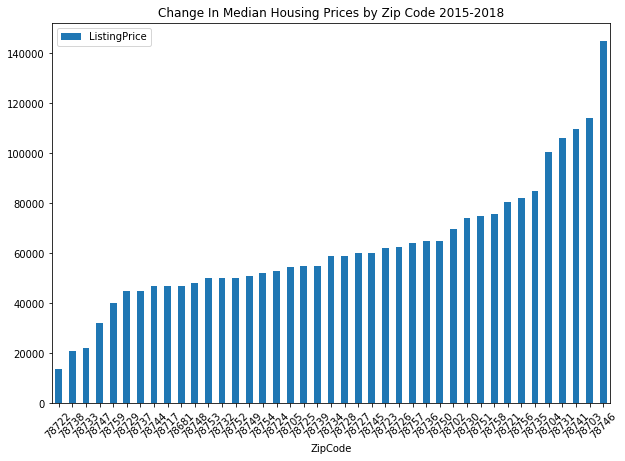

In [3]:
total_change_listing_2015_2018 = (final_listings_grouped_2015_2018_df.diff(axis='columns'))
total_change_listing_2015_2018 = total_change_listing_2015_2018.unstack().reset_index(name='ListingPrice')
total_change_listing_2015_2018 = total_change_listing_2015_2018.dropna()
total_change_listing_2015_2018.sort_values(by=['ListingPrice'], inplace=True)
ax = total_change_listing_2015_2018.plot(kind='bar',x='ZipCode',y='ListingPrice', rot=45, figsize=(10,7), title='Change In Median Housing Prices by Zip Code 2015-2018')
plt.savefig("../images/chg_in_median_price.png")

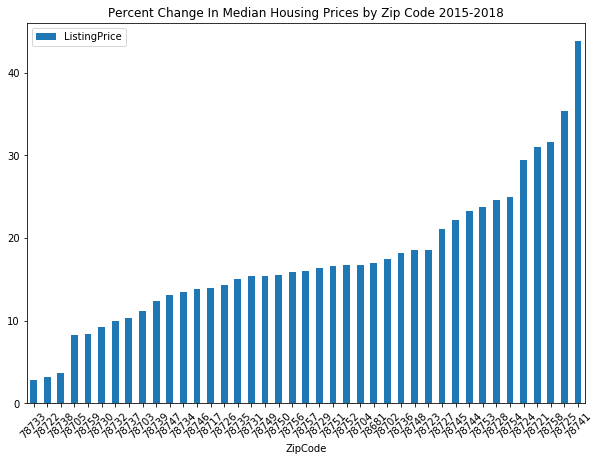

In [4]:
pct_change_listing_2015_2018 = (final_listings_grouped_2015_2018_df.pct_change(axis='columns', fill_method='ffill'))*100
pct_change_listing_2015_2018 = pct_change_listing_2015_2018.unstack().reset_index(name='ListingPrice')
pct_change_listing_2015_2018 = pct_change_listing_2015_2018.dropna()
pct_change_listing_2015_2018.sort_values(by=['ListingPrice'], inplace=True)
ax = pct_change_listing_2015_2018.plot(kind='bar',x='ZipCode',y='ListingPrice', rot=45, figsize=(10,7), title='Percent Change In Median Housing Prices by Zip Code 2015-2018')
plt.savefig("../images/per_chg_in_median_price.png")